In [29]:
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

In [30]:
#part a
#load dataset
data = load_breast_cancer()
x = data.data
y = data.target
#part b
#display data feature names and target names
print(data.feature_names)
print()
print(data.target_names)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']

['malignant' 'benign']


In [31]:
#part c
#split x and y to train and test for 50/50
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size = .5, random_state = 0)


In [32]:
#part f
dtClass = DecisionTreeClassifier(criterion="entropy", max_depth=2)
#fit tree to x and y train data sets
dtClass.fit(xTrain, yTrain)
#produce predictions for y
yPred = dtClass.predict(xTest)
#part g
print(accuracy_score(yTest, yPred))
print(confusion_matrix(yTest, yPred))

0.8947368421052632
[[ 88  13]
 [ 17 167]]


[Text(0.5, 0.8333333333333334, 'mean concave points <= 0.049\nentropy = 0.965\nsamples = 284\nvalue = [111, 173]\nclass = benign'),
 Text(0.25, 0.5, 'worst concave points <= 0.111\nentropy = 0.198\nsamples = 163\nvalue = [5, 158]\nclass = benign'),
 Text(0.125, 0.16666666666666666, 'entropy = 0.059\nsamples = 145\nvalue = [1, 144]\nclass = benign'),
 Text(0.375, 0.16666666666666666, 'entropy = 0.764\nsamples = 18\nvalue = [4, 14]\nclass = benign'),
 Text(0.75, 0.5, 'worst perimeter <= 114.65\nentropy = 0.541\nsamples = 121\nvalue = [106, 15]\nclass = malignant'),
 Text(0.625, 0.16666666666666666, 'entropy = 0.994\nsamples = 33\nvalue = [18, 15]\nclass = malignant'),
 Text(0.875, 0.16666666666666666, 'entropy = 0.0\nsamples = 88\nvalue = [88, 0]\nclass = malignant')]

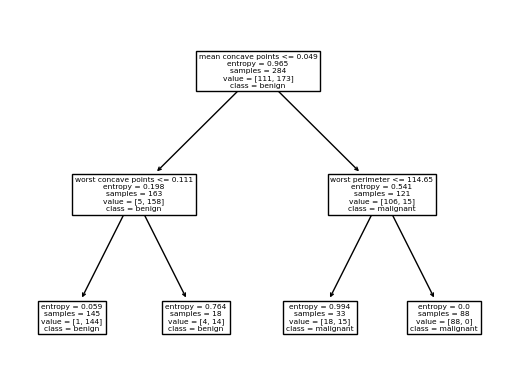

In [33]:
#part h
#plot decision tree for  feature names, and target names
plot_tree(dtClass, feature_names = data.feature_names, class_names = data.target_names)

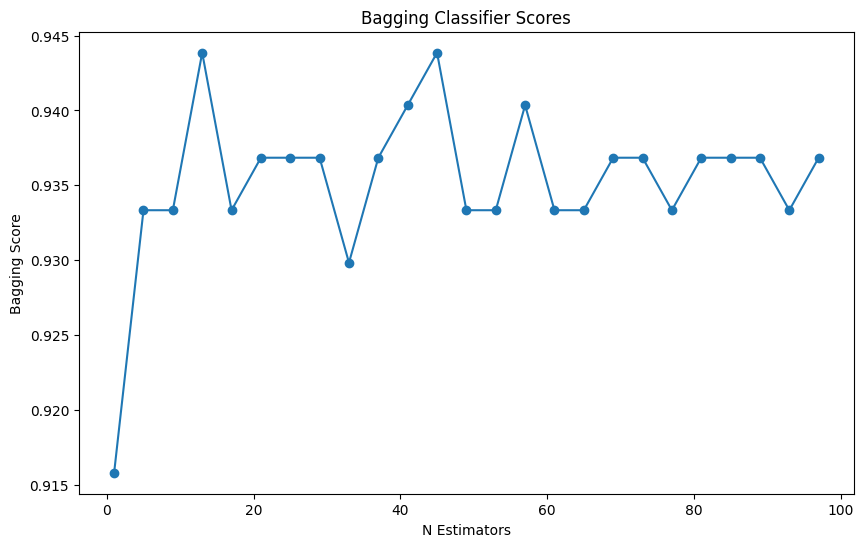

In [34]:
#part i
#create array for nEstimator from 1 to 100 with step size of 4 for generating more than 20 points
n_estimatorArr = np.arange(1, 101, 4)

# Record bagging score for each n_estimators
bagScoreArr = []
for i in range(len(n_estimatorArr)):
    # intiialize bag classifier with decisionTreeClassifier
    bagClass = BaggingClassifier(estimator=dtClass, n_estimators=n_estimatorArr[i])
    #fit the bag classi to x and y train datasets
    bagClass.fit(xTrain, yTrain)
    # get the predicitons of the bag class
    yPredBag = bagClass.predict(xTest)
    #get the bagScore and append it to the array
    bagScore = accuracy_score(yTest, yPredBag)
    bagScoreArr.append(bagScore)

# Plot bagging scores
plt.figure(figsize=(10, 6))
plt.plot(n_estimatorArr, bagScoreArr, marker="o")
plt.xlabel("N Estimators")
plt.ylabel("Bagging Score")
plt.title("Bagging Classifier Scores")
plt.show()

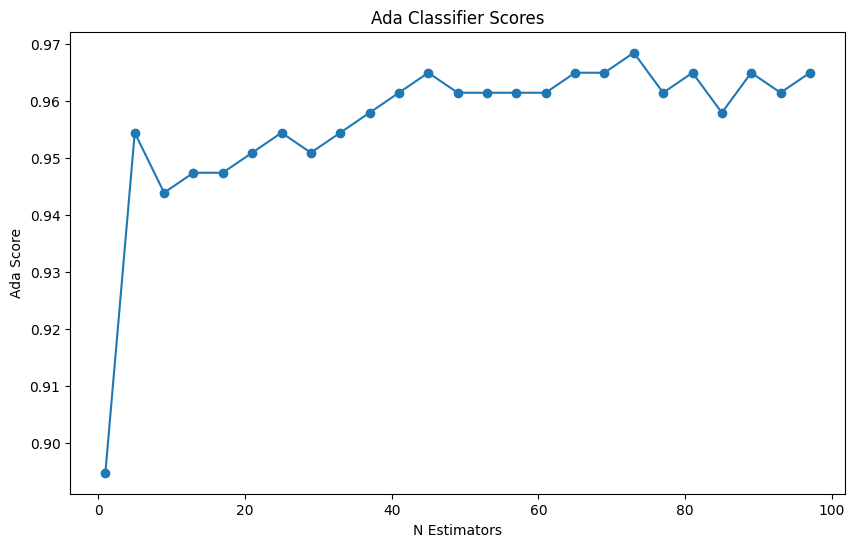

In [35]:
#part j
#create array for nEstimator from 1 to 100 with step size of 4 for generating more than 20 points
n_estimatorArr = np.arange(1, 101, 4)

adaScoreArr = []
for i in range(len(n_estimatorArr)):
    #intialize AdaClassifier with DecisionTreeClassifier
    adaClass = AdaBoostClassifier(estimator=dtClass, n_estimators=n_estimatorArr[i])
    #train adaClassifier based on x and y train datasets
    adaClass.fit(xTrain, yTrain)
    #get precitions from adaClass
    yPredAda = adaClass.predict(xTest)
    #get adaScore from accuracy score then appen to arr
    adaScore = accuracy_score(yTest, yPredAda)
    adaScoreArr.append(adaScore)

# Plot bagging scores
plt.figure(figsize=(10, 6))
plt.plot(n_estimatorArr, adaScoreArr, marker="o")
plt.xlabel("N Estimators")
plt.ylabel("Ada Score")
plt.title("Ada Classifier Scores")
plt.show()

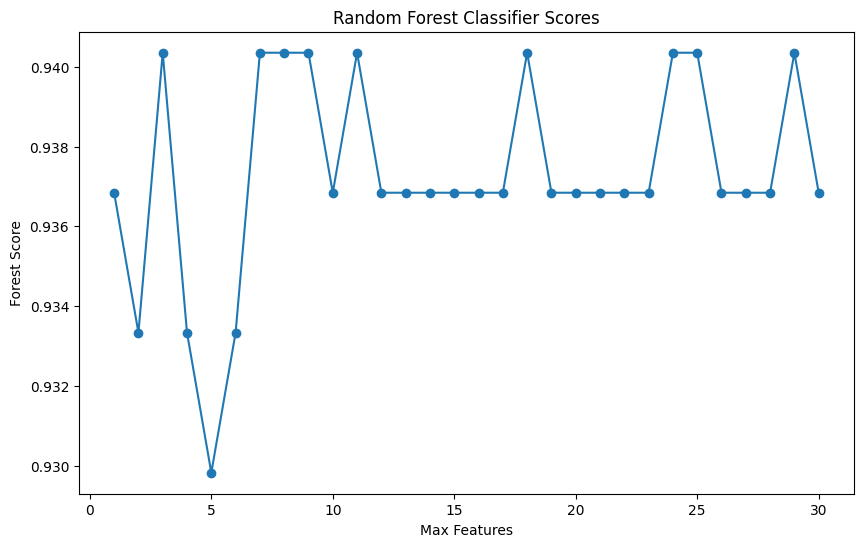

In [36]:
#part k
# define max feature arr
maxFeatureArr = np.arange(1, x.shape[1] + 1)

forestScoreArr = []
for i in range(len(maxFeatureArr)):
    #intialize the rfClass
    rfClass = RandomForestClassifier(max_features= i + 1, n_estimators=100, criterion="entropy", max_depth=2) 
    #fit the class by x and y training datasets         
    rfClass.fit(xTrain, yTrain)
    #predictions of rfClass
    yPredRf = rfClass.predict(xTest)
    #get forestScore
    forestScore = accuracy_score(yTest, yPredRf)
    forestScoreArr.append(forestScore)

# Plot forest scores
plt.figure(figsize=(10, 6))
plt.plot(maxFeatureArr, forestScoreArr, marker="o")
plt.xlabel("Max Features")
plt.ylabel("Forest Score")
plt.title("Random Forest Classifier Scores")
plt.show()